In [1]:
%load_ext autoreload
%autoreload 2

# Exercise

Creating an instance of the network.

In [2]:
from os import path
from settings import DRC_DIR, BINARY, DEFAULT_PARAMETER_PATH
from model import DRCNetwork, Parameter
from io_ import plot_cycles_comparison, read_txt_file, print_list
from model import Activations
from matplotlib import pyplot as plt

Parameter.DEFAULT_PARAMETER_PATH.set_default_parameter_path(new_path=DEFAULT_PARAMETER_PATH)

drc = DRCNetwork(
    dir_=DRC_DIR,
    binary=BINARY
)

In [3]:
drc

DRCNetwork[C:\Users\user.LAPTOP-G27BJ7JO\Desktop\SISSA\CREPALDI\assignment2\drc\drc]

## Exercise 1

The regularity effect consists in the fact that words with a regular spelling (e.g., *wick*) gets named more quickly than words with an irregular spelling (e.g., *wand*; McCann and Besner, 1987; Rastle and Coltheart, 1999). Explain how the DRC offers an account for this effect, and verifies it by simulating the reading of a bunch of regular words (`regular.txt`) and a comparable set of irregular words (`irregular.txt`). Illustrate which activations in the DRC dynamics confirms your verbal account. Now try to make the regularity effect bigger, or smaller – how would you do that? Illustrate with simulations.

In [4]:
regular_words = read_txt_file(file_path=path.join(DRC_DIR, "regular.txt"))

print_list(l=regular_words, title="Regular words")

Regular words
- buds
- canes
- coil
- curl
- grade
- lump
- lode
- pops
- rump
- sock
- sage
- suck
- sobs
- wade
- weed
- wick
- weld
- wilt
- woke
- wink
Tot: 20


In [5]:
irregular_words = read_txt_file(file_path=path.join(DRC_DIR, "irregular.txt"))

print_list(l=irregular_words, title="Irregular words")

Irregular words
- bury
- caste
- comb
- grow
- glove
- lure
- lute
- pour
- ruse
- sew
- sans
- sues
- sown
- wand
- warn
- warp
- wasp
- wily
- wool
- worm
Tot: 20


In [6]:
regular_results, regular_activations = drc.run(
    word="regular.txt",
    store_activations=True
)

Running: ./drc -a -b regular.txt


In [7]:
irregular_results, irregular_activations = drc.run(
    word="irregular.txt",
    store_activations=True
)

Running: ./drc -a -b irregular.txt


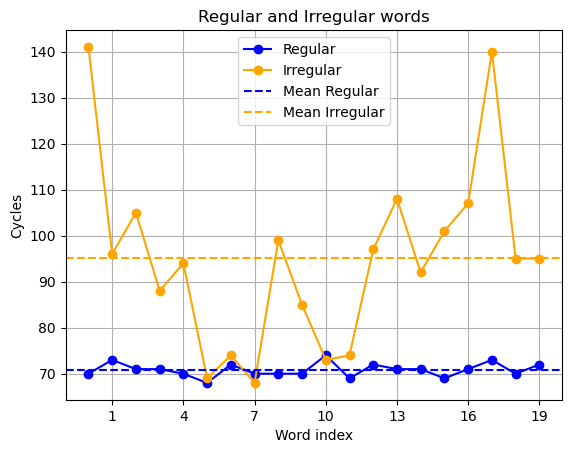

In [8]:
plot_cycles_comparison(
    results_a=regular_results,
    results_b=irregular_results,
    legend_a="Regular",
    legend_b="Irregular",
    title="Regular and Irregular words"
)

In [15]:
best_regular    = min(  regular_results, key=lambda x: x.cycles)
worst_irregular = max(irregular_results, key=lambda x: x.cycles)

AttributeError: 'str' object has no attribute 'cycles'

In [10]:
[word for word, result in irregular_results.items() if result.cycles < 80]

['lure', 'lute', 'pour', 'sans', 'sues']

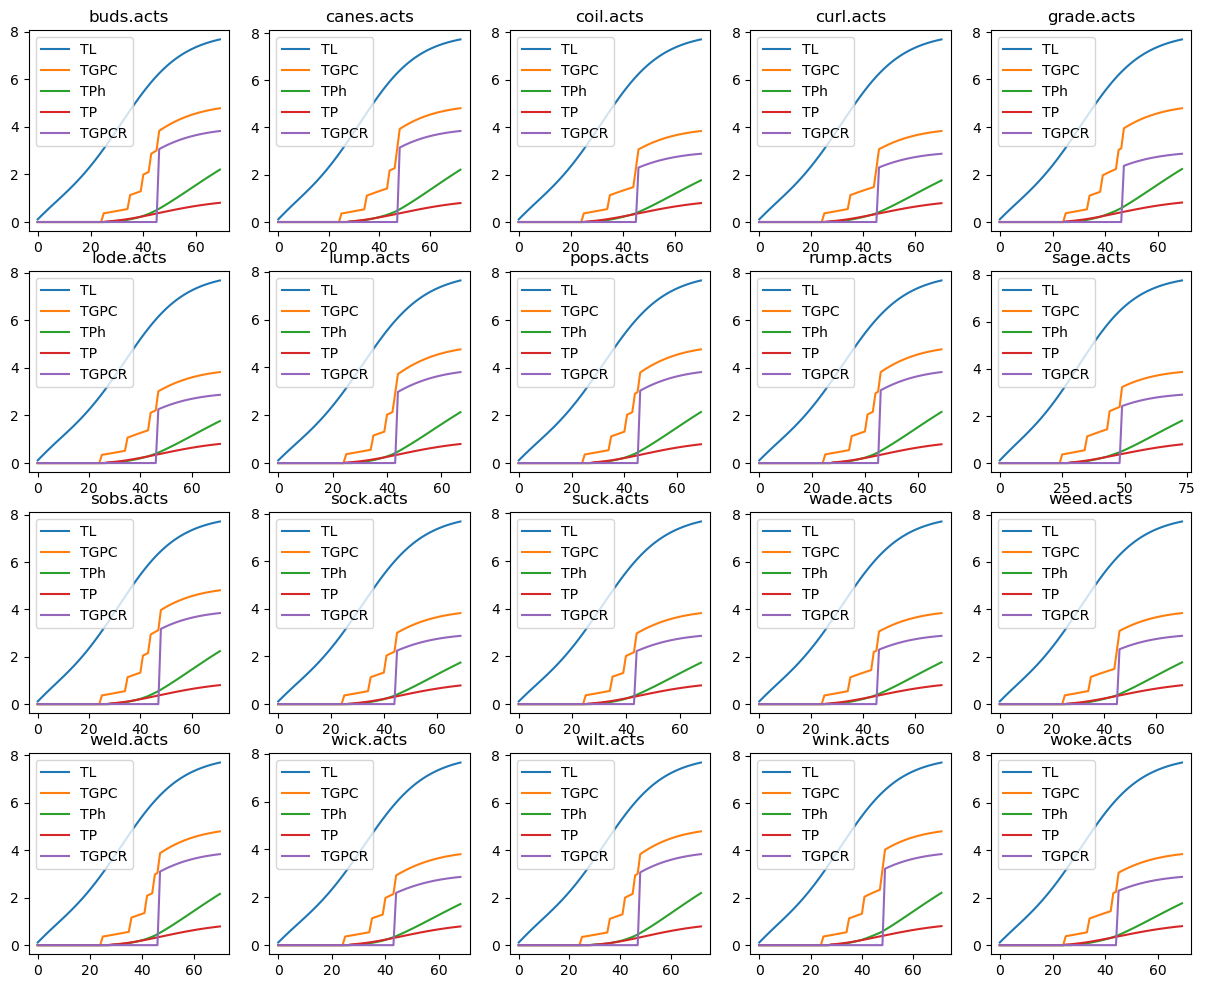

In [11]:
regular_activations.plot_multiple(nrows=4)

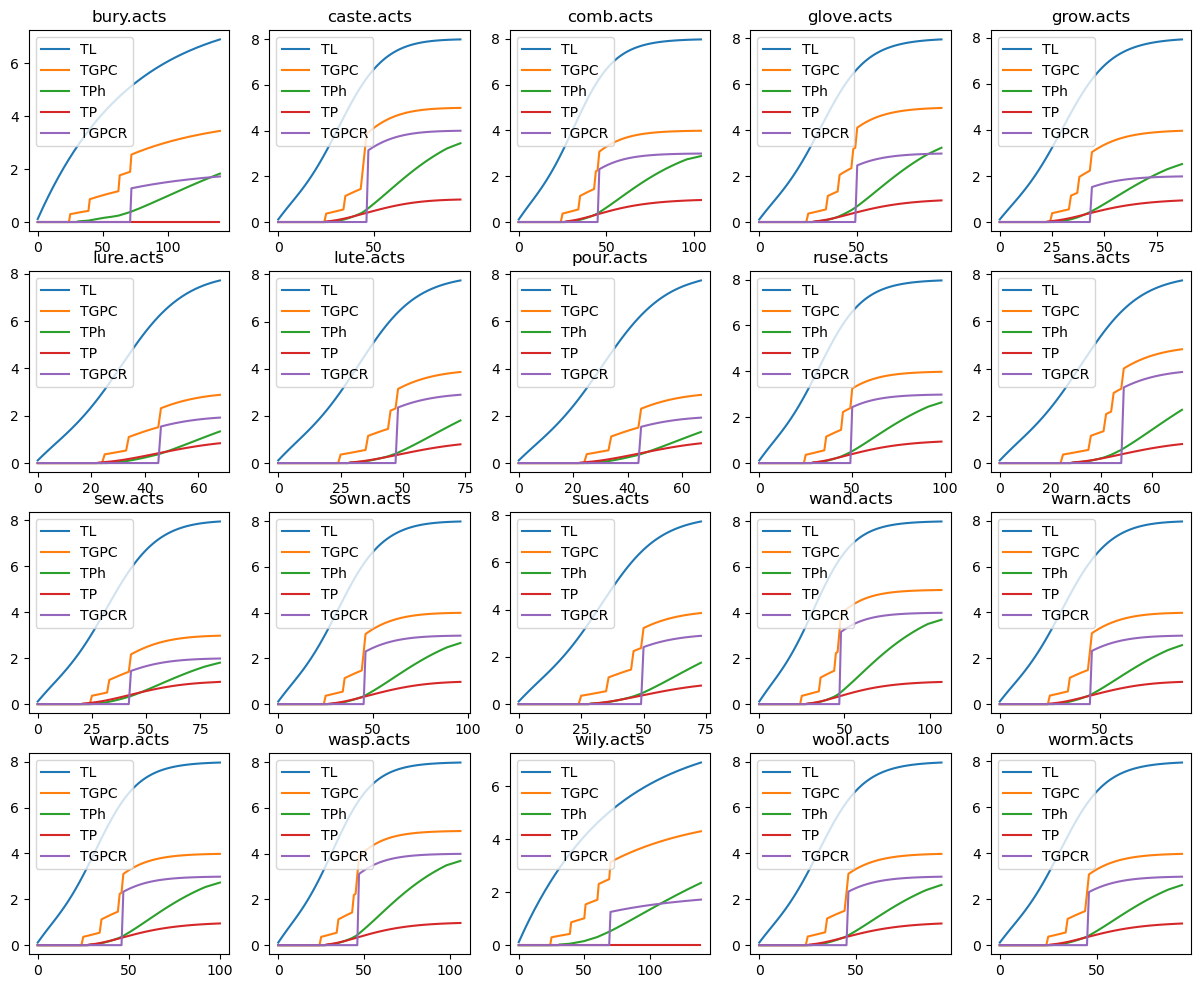

In [12]:
irregular_activations.plot_multiple(nrows=4)

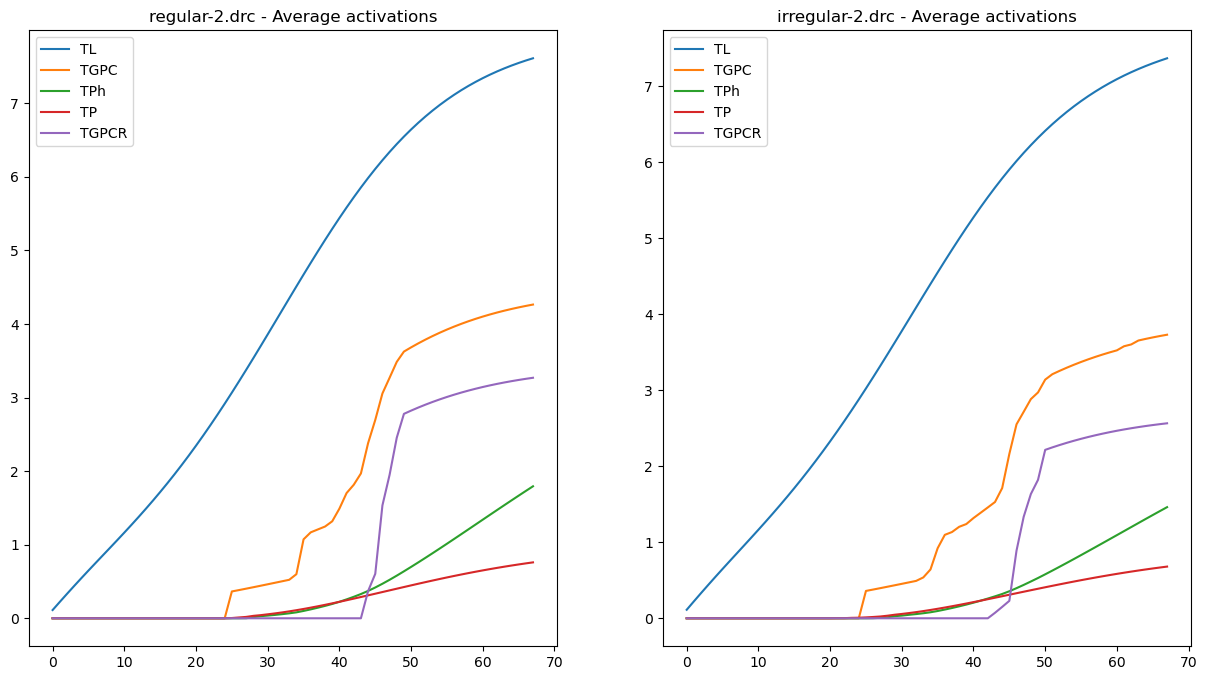

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

regular_activations  .plot_average(ax=axes[0])
irregular_activations.plot_average(ax=axes[1])

In [24]:
best_regular    = min(regular_results.values(),   key=lambda x: x.cycles).word
worst_irregular = max(irregular_results.values(), key=lambda x: x.cycles).word

print(best_regular)
print(worst_irregular)

lump
bury


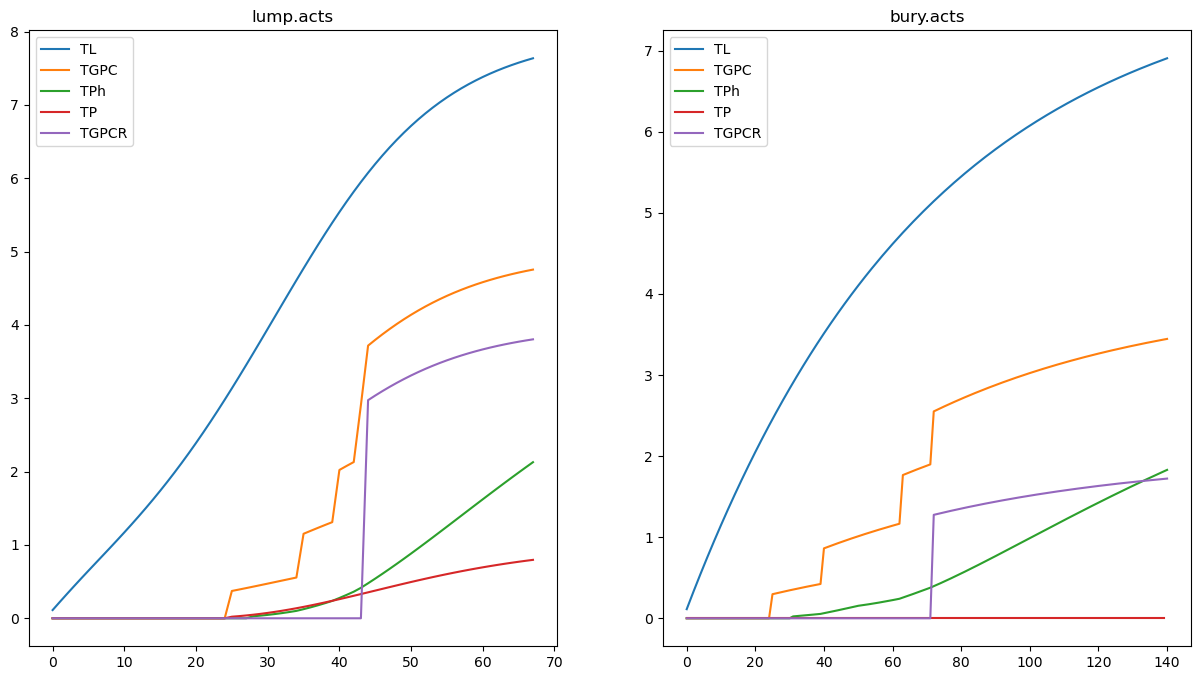

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

regular_activations.  plot(file_name=f"{best_regular}.acts", ax=axes[0])
irregular_activations.plot(file_name=f"{worst_irregular}.acts", ax=axes[1])

In [26]:
for param in [
    Parameter.OrthlexLetterExcitation,
    Parameter.OrthlexPhonlexExcitation,
    Parameter.PhonlexOrthlexExcitation
]:
    print(f"{param} default: {param.default}")

OrthlexLetterExcitation default: 0.3
OrthlexPhonlexExcitation default: 0.25
PhonlexOrthlexExcitation default: 0.25


Running: ./drc --nofiles -S OrthlexPhonlexExcitation 0.1 0.9 10 lump


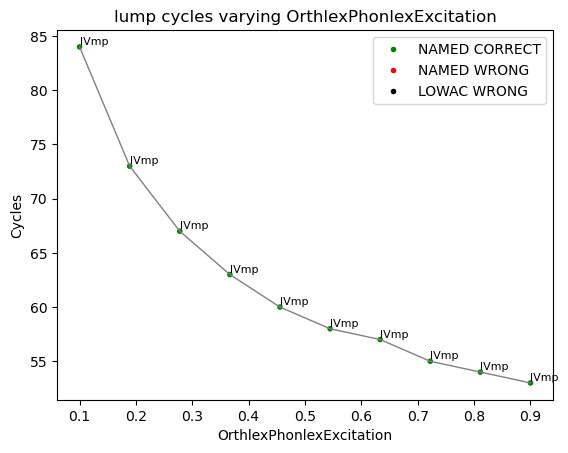

In [27]:
drc.run(
    word=best_regular,
    parameters=[(Parameter.OrthlexPhonlexExcitation, (0.10, 0.90, 10))]
).plot_cycles()

Running: ./drc --nofiles -S OrthlexLetterExcitation 0.1 0.9 10 bury


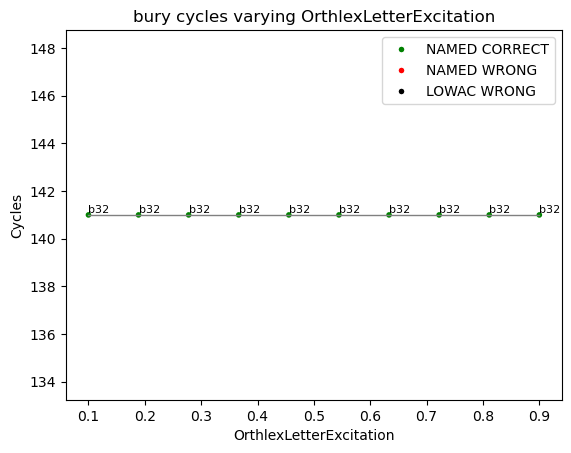

In [28]:
drc.run(
    word=worst_irregular,
    parameters=[(Parameter.OrthlexLetterExcitation, (0.10, 0.90, 10))]
).plot_cycles()

Running: ./drc --nofiles -S OrthlexLetterExcitation 0.1 0.9 10 warp


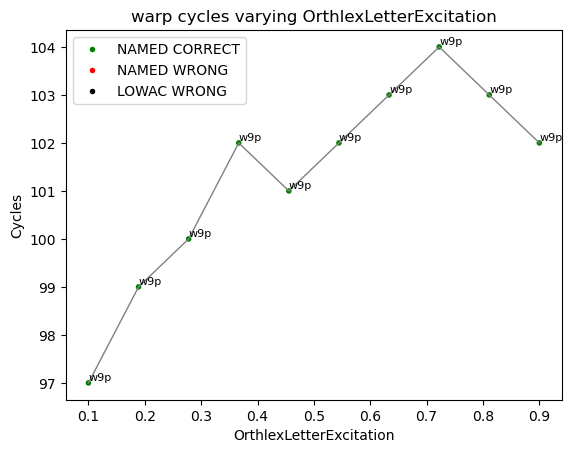

In [29]:
import random

random_irregular = random.choice(irregular_words)

while random_irregular == worst_irregular:
    random_irregular = random.choice(irregular_words)

drc.run(
    word=random.choice(irregular_words),
    parameters=[(Parameter.OrthlexLetterExcitation, (0.10, 0.90, 10))]
).plot_cycles()

In [20]:
parameters_irregularity = [
    (Parameter.OrthlexLetterExcitation, 0.5),
    (Parameter.OrthlexPhonlexExcitation, 0.5),
    (Parameter.PhonlexOrthlexExcitation, 0.5)
]
regular_results_irreg   = drc.run(word="regular.txt",   parameters=parameters_irregularity)
irregular_results_irreg = drc.run(word="irregular.txt", parameters=parameters_irregularity)

Running: ./drc --nofiles -P OrthlexLetterExcitation 0.5 -P OrthlexPhonlexExcitation 0.5 -P PhonlexOrthlexExcitation 0.5 -b regular.txt
Running: ./drc --nofiles -P OrthlexLetterExcitation 0.5 -P OrthlexPhonlexExcitation 0.5 -P PhonlexOrthlexExcitation 0.5 -b irregular.txt


In [21]:
regular_results_irreg

{'buds': [buds: bVdz - NAMED CORRECT; cycles: 58],
 'canes': [canes: k1nz - NAMED CORRECT; cycles: 60],
 'coil': [coil: k4l - NAMED CORRECT; cycles: 59],
 'curl': [curl: k3l - NAMED CORRECT; cycles: 59],
 'grade': [grade: gr1d - NAMED CORRECT; cycles: 57],
 'lump': [lump: lVmp - NAMED CORRECT; cycles: 57],
 'lode': [lode: l5d - NAMED CORRECT; cycles: 61],
 'pops': [pops: pQps - NAMED CORRECT; cycles: 59],
 'rump': [rump: rVmp - NAMED CORRECT; cycles: 59],
 'sock': [sock: sQk - NAMED CORRECT; cycles: 59],
 'sage': [sage: s1_ - NAMED CORRECT; cycles: 60],
 'suck': [suck: sVk - NAMED CORRECT; cycles: 58],
 'sobs': [sobs: sQbz - NAMED CORRECT; cycles: 59],
 'wade': [wade: w1d - NAMED CORRECT; cycles: 59],
 'weed': [weed: wid - NAMED CORRECT; cycles: 58],
 'wick': [wick: wIk - NAMED CORRECT; cycles: 58],
 'weld': [weld: wEld - NAMED CORRECT; cycles: 59],
 'wilt': [wilt: wIlt - NAMED CORRECT; cycles: 61],
 'woke': [woke: w5k - NAMED CORRECT; cycles: 58],
 'wink': [wink: wINk - NAMED CORRECT;

In [22]:
parameters_regularity = [
    (Parameter.OrthlexLetterExcitation, 0.1),
    (Parameter.OrthlexPhonlexExcitation, 0.1),
    (Parameter.PhonlexOrthlexExcitation, 0.1)
]
regular_results_reg   = drc.run(word="regular.txt", parameters=parameters_regularity)
irregular_results_reg = drc.run(word="irregular.txt", parameters=parameters_regularity)

Running: ./drc --nofiles -P OrthlexLetterExcitation 0.1 -P OrthlexPhonlexExcitation 0.1 -P PhonlexOrthlexExcitation 0.1 -b regular.txt
Running: ./drc --nofiles -P OrthlexLetterExcitation 0.1 -P OrthlexPhonlexExcitation 0.1 -P PhonlexOrthlexExcitation 0.1 -b irregular.txt


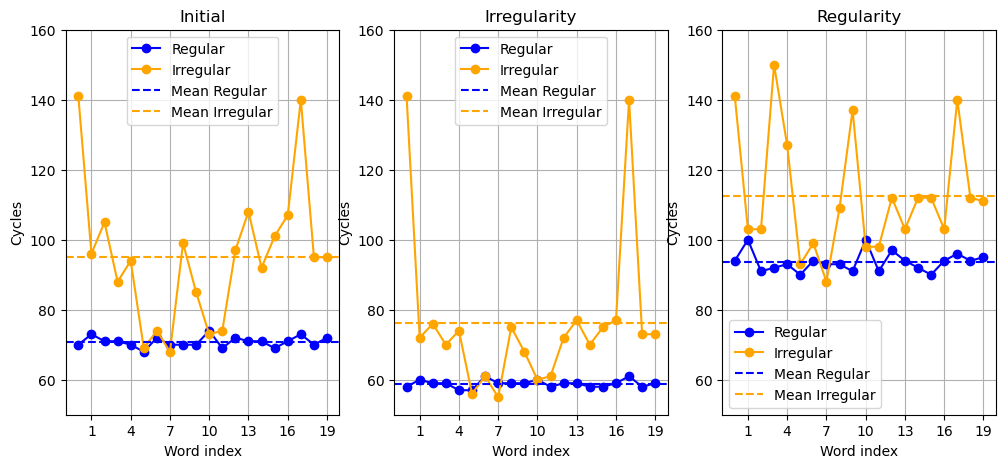

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

results = [
    (regular_results,       irregular_results),
    (regular_results_irreg, irregular_results_irreg),
    (regular_results_reg,   irregular_results_reg)
]

for i, (result, title) in enumerate(zip(results, ["Initial", "Irregularity", "Regularity"])):
    
    regular, irregular = result
    
    plot_cycles_comparison(
        results_a=regular,
        results_b=irregular,
        legend_a="Regular",
        legend_b="Irregular",
        title=title,
        yrange=(50, 160),
        ax=axes[i]
    )

In [38]:
best_regular_activation_file

'C:\\Users\\user.LAPTOP-G27BJ7JO\\Desktop\\SISSA\\CREPALDI\\assignment2\\drc\\regular-2.drc\\lump.acts'

In [100]:
activation[20]['L']

{0: ['0.281503', 'l'],
 1: ['0.281503', 'u'],
 2: ['0.281503', 'm'],
 3: ['0.281503', 'p'],
 4: ['0.281503', '+'],
 5: ['0.281503', '+'],
 6: ['0.281503', '+'],
 7: ['0.281503', '+']}

## Exercise 2

The pseudo-homophone effect consists in the fact that nonwords that are homophonic to real words (e.g., *brane*, *brees*) are read faster than otherwise comparable control nonwords (e.g., *clafe*, *kraaf*; e.g., McCann and Besner, 1987; Taft and Russell, 1992). Try and see whether the DRC is able to simulate the effect (use `nonwordPseudohomophone.txt` `andnonwordNonPseudohomophones.txt`). Why does this effect arise? Illustrate with reference to the activation dynamics.

In [40]:
pseudohomophone_words = read_txt_file(file_path=path.join(DRC_DIR, "nonwordPseudohomophone.txt"))

print_list(l=pseudohomophone_words, title="Pseudo Homophone")

Pseudo Homophone
- brane
- milc
- gole
- gaim
- whele
- poast
- moov
- rayne
- traid
- tode
- rume
- maik
- hed
- groope
- keap
- stawk
- blak
- hoam
- blud
- fite
- blo
- treet
- hye
- cawl
- shaip
- larst
- lej
- berd
- cair
- croo
Tot: 30


In [41]:
non_pseudohomophone_words = read_txt_file(file_path=path.join(DRC_DIR, "nonwordNonPseudohomophone.txt"))

print_list(l=pseudohomophone_words, title="Non Pseudo Homophone")

Non Pseudo Homophone
- brane
- milc
- gole
- gaim
- whele
- poast
- moov
- rayne
- traid
- tode
- rume
- maik
- hed
- groope
- keap
- stawk
- blak
- hoam
- blud
- fite
- blo
- treet
- hye
- cawl
- shaip
- larst
- lej
- berd
- cair
- croo
Tot: 30


In [42]:
pseudohomophone_results, pseudohomophone_activations = drc.run(
    word="nonwordPseudohomophone.txt",
    store_activations=True
)

Running: ./drc -a -b nonwordPseudohomophone.txt


In [62]:
non_pseudohomophone_results, non_pseudohomophone_activations = drc.run(
    word="nonwordNonPseudohomophone.txt",
    store_activations=True
)

Running: ./drc -a -b nonwordNonPseudohomophone.txt


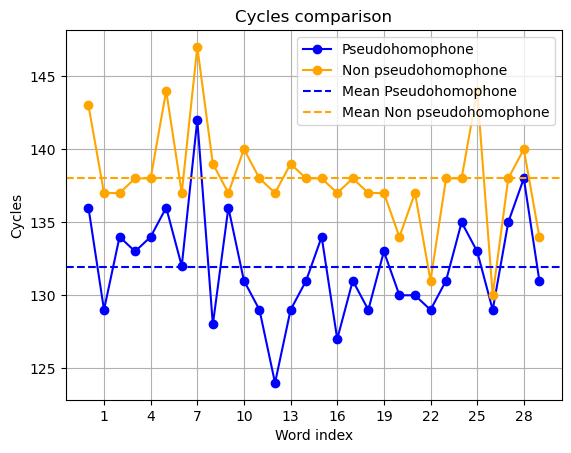

In [44]:
plot_cycles_comparison(
    results_a=pseudohomophone_results,
    results_b=non_pseudohomophone_results,
    legend_a="Pseudohomophone",
    legend_b="Non pseudohomophone"
)

In [45]:
[word for word, result in pseudohomophone_results.items() if result.cycles > 140]

['rayne']

In [46]:
[word for word, result in non_pseudohomophone_results.items() if result.cycles < 135]

['clo', 'kye', 'bej', 'snoo']

In [60]:
import statistics

# Median values
pseudohomophone_ex = next(iter([
    result.word for result in pseudohomophone_results.values()
    if result.cycles == statistics.median(pseudohomophone_results[word].cycles for word in pseudohomophone_results)
]))

non_pseudohomophone_ex = next(iter([
    result.word for result in non_pseudohomophone_results.values()
    if result.cycles == statistics.median(non_pseudohomophone_results[word].cycles for word in non_pseudohomophone_results)
]))

In [61]:
print("Words in object: ")
print(f"- {pseudohomophone_ex}")
print(f"- {non_pseudohomophone_ex}")

Words in object: 
- rume
- raim


In [63]:
pseudohomophone_ex_activation_file     = path.join(path.split(    pseudohomophone_activations)[0], f"{    pseudohomophone_ex   }.acts")
non_pseudohomophone_ex_activation_file = path.join(path.split(non_pseudohomophone_activations)[0], f"{non_pseudohomophone_ex}.acts")

In [64]:
pseudohomophone_ex_activation     = Activations(activation_file=pseudohomophone_ex_activation_file)
non_pseudohomophone_ex_activation = Activations(activation_file=non_pseudohomophone_ex_activation_file)

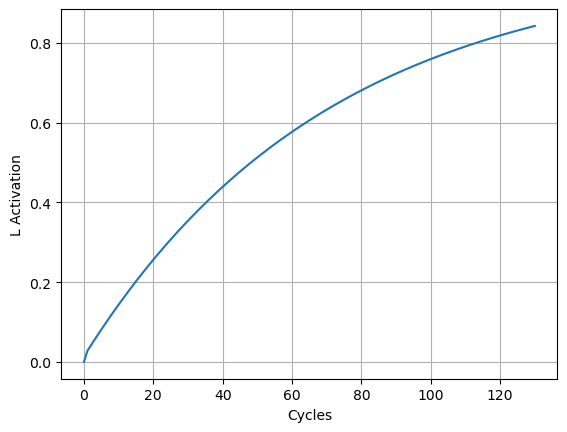

In [66]:
pseudohomophone_ex_activation.plot()

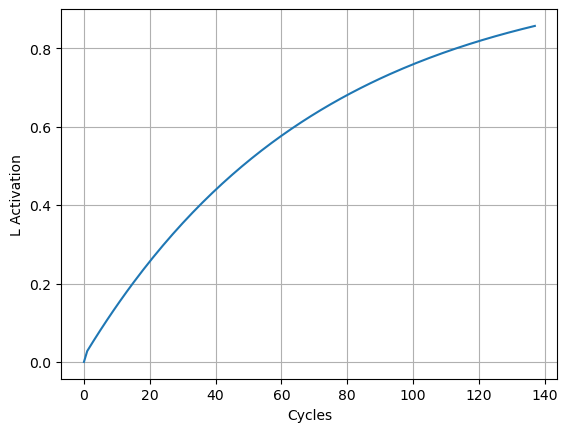

In [67]:
non_pseudohomophone_ex_activation.plot()

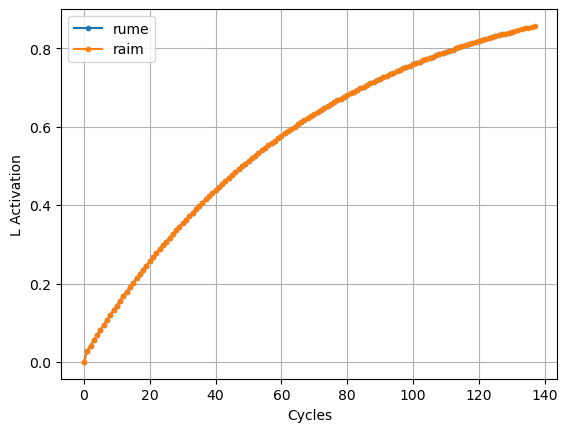

In [65]:
Activations.plot_multiple_activations(
    activations_list=[
        pseudohomophone_ex_activation,
        non_pseudohomophone_ex_activation
    ]
)

## Exercise 3

A brain injured patient is diagnosed with Surface Dyslexia when s/he’s better at reading regular words (`regular.txt`) and nonwords(`nonwordsNonPseudohomophones.txt`), as compared to irregular words(`irregular.txt`; e.g., Patterson, Marshall and Coltheart, 1985). How would you simulate such a patient with the DRC? Is there only one way to do so? If not,describe two different damages to the system that would generate the impairment, and illustrate their (different) behaviour.